In [22]:
!pip install seaborn

You should consider upgrading via the '/home/kayser/.cache/pypoetry/virtualenvs/spark-ml-training-xDY9FCqV-py3.10/bin/python -m pip install --upgrade pip' command.


In [54]:
# Import Matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib

# plt.style.use('ggplot')
plt.style.use("theme_bw.mplstyle")

font = {
    "family": "Arial",
    # 'weight' : 'bold',
    "size": 16,
}

matplotlib.rc("font", **font)

matplotlib.rcParams['figure.figsize'] = (12, 6) # (18, 12)

In [55]:
# Read statistics.json file
statistics = pd.read_json(
    "statistics-40replicas-0waittime-30interval.json", orient="records"
).T
statistics.reset_index(inplace=True)

# remove index column
statistics.drop("index", axis=1, inplace=True)

statistics.head()


,id,runId,name,timestamp,batchId,numInputRows,inputRowsPerSecond,processedRowsPerSecond,durationMs,stateOperators,sources,sink
0,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T02:38:24.177Z,9060,1796,460.749102,500.696961,"{'addBatch': 3425, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...
1,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T02:38:27.765Z,9061,1888,526.198439,511.791813,"{'addBatch': 3578, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...
2,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T02:38:31.455Z,9062,1866,505.691057,511.232877,"{'addBatch': 3462, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...
3,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T02:38:35.106Z,9063,1828,500.684744,516.676088,"{'addBatch': 3431, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...
4,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T02:38:38.644Z,9064,1911,540.13567,502.498028,"{'addBatch': 3694, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...


In [56]:
# statistics = pd.concat([statistics, pd.json_normalize(statistics["durationMs"])])
temp_df = pd.json_normalize(statistics["durationMs"])
temp_df.head()


,addBatch,getBatch,latestOffset,queryPlanning,triggerExecution,walCommit
0,3425,0,47,74,3587,18
1,3578,0,0,69,3689,20
2,3462,0,73,76,3650,19
3,3431,0,1,70,3538,17
4,3694,0,2,68,3803,18


In [57]:
statistics = statistics.join(temp_df)
statistics.head()


,id,runId,name,timestamp,batchId,numInputRows,inputRowsPerSecond,processedRowsPerSecond,durationMs,stateOperators,sources,sink,addBatch,getBatch,latestOffset,queryPlanning,triggerExecution,walCommit
0,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T02:38:24.177Z,9060,1796,460.749102,500.696961,"{'addBatch': 3425, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...,3425,0,47,74,3587,18
1,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T02:38:27.765Z,9061,1888,526.198439,511.791813,"{'addBatch': 3578, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...,3578,0,0,69,3689,20
2,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T02:38:31.455Z,9062,1866,505.691057,511.232877,"{'addBatch': 3462, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...,3462,0,73,76,3650,19
3,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T02:38:35.106Z,9063,1828,500.684744,516.676088,"{'addBatch': 3431, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...,3431,0,1,70,3538,17
4,2898ab06-3d5a-4122-a982-c34ceb971c77,24a7184b-2ee1-4cdd-b560-27810a7b6036,None,2022-06-29T02:38:38.644Z,9064,1911,540.13567,502.498028,"{'addBatch': 3694, 'getBatch': 0, 'latestOffse...",[],[{'description': 'KafkaV2[Subscribe[to_predict...,{'description': 'org.apache.spark.sql.kafka010...,3694,0,2,68,3803,18


In [58]:
statistics[
    [
        "durationMs",
        "addBatch",
        "getBatch",
        "latestOffset",
        "queryPlanning",
        "triggerExecution",
        "walCommit",
    ]
]


,durationMs,addBatch,getBatch,latestOffset,queryPlanning,triggerExecution,walCommit
0,"{'addBatch': 3425, 'getBatch': 0, 'latestOffse...",3425,0,47,74,3587,18
1,"{'addBatch': 3578, 'getBatch': 0, 'latestOffse...",3578,0,0,69,3689,20
2,"{'addBatch': 3462, 'getBatch': 0, 'latestOffse...",3462,0,73,76,3650,19
3,"{'addBatch': 3431, 'getBatch': 0, 'latestOffse...",3431,0,1,70,3538,17
4,"{'addBatch': 3694, 'getBatch': 0, 'latestOffse...",3694,0,2,68,3803,18
...,...,...,...,...,...,...,...
712,"{'addBatch': 3805, 'getBatch': 0, 'latestOffse...",3805,0,1,70,3913,19
713,"{'addBatch': 3503, 'getBatch': 0, 'latestOffse...",3503,0,80,75,3699,17
714,"{'addBatch': 3594, 'getBatch': 0, 'latestOffse...",3594,0,1,74,3716,21
715,"{'addBatch': 3501, 'getBatch': 0, 'latestOffse...",3501,0,1,318,3862,20


In [59]:
# "durationMs": {
#   "addBatch": 3483,
#   "getBatch": 0,
#   "latestOffset": 1,
#   "queryPlanning": 71,
#   "triggerExecution": 3592,
#   "walCommit": 18
# },

statistics["durationMsJSON"] = statistics["durationMs"]

statistics["microbatchDurationMs"] = (
    statistics["addBatch"]
    + statistics["getBatch"]
    + statistics["latestOffset"]
    + statistics["queryPlanning"]
    + statistics["triggerExecution"]
    + statistics["walCommit"]
)

statistics[
    [
        "microbatchDurationMs",
        "addBatch",
        "getBatch",
        "latestOffset",
        "queryPlanning",
        "triggerExecution",
        "walCommit",
    ]
]


,microbatchDurationMs,addBatch,getBatch,latestOffset,queryPlanning,triggerExecution,walCommit
0,7151,3425,0,47,74,3587,18
1,7356,3578,0,0,69,3689,20
2,7280,3462,0,73,76,3650,19
3,7057,3431,0,1,70,3538,17
4,7585,3694,0,2,68,3803,18
...,...,...,...,...,...,...,...
712,7808,3805,0,1,70,3913,19
713,7374,3503,0,80,75,3699,17
714,7406,3594,0,1,74,3716,21
715,7702,3501,0,1,318,3862,20


In [60]:
# convert timestamp to datetime
statistics["timestamp"] = pd.to_datetime(statistics["timestamp"])

statistics["time"] = statistics["timestamp"] - statistics["timestamp"].min()
statistics["time"] = statistics["time"].apply(lambda x: x.total_seconds())
statistics[["timestamp", "time"]]


,timestamp,time
0,2022-06-29 02:38:24.177000+00:00,0.000
1,2022-06-29 02:38:27.765000+00:00,3.588
2,2022-06-29 02:38:31.455000+00:00,7.278
3,2022-06-29 02:38:35.106000+00:00,10.929
4,2022-06-29 02:38:38.644000+00:00,14.467
...,...,...
712,2022-06-29 03:27:28.356000+00:00,2944.179
713,2022-06-29 03:27:32.269000+00:00,2948.092
714,2022-06-29 03:27:35.969000+00:00,2951.792
715,2022-06-29 03:27:39.685000+00:00,2955.508


In [61]:
statistics = statistics[statistics["time"] < 2500]


## Plots

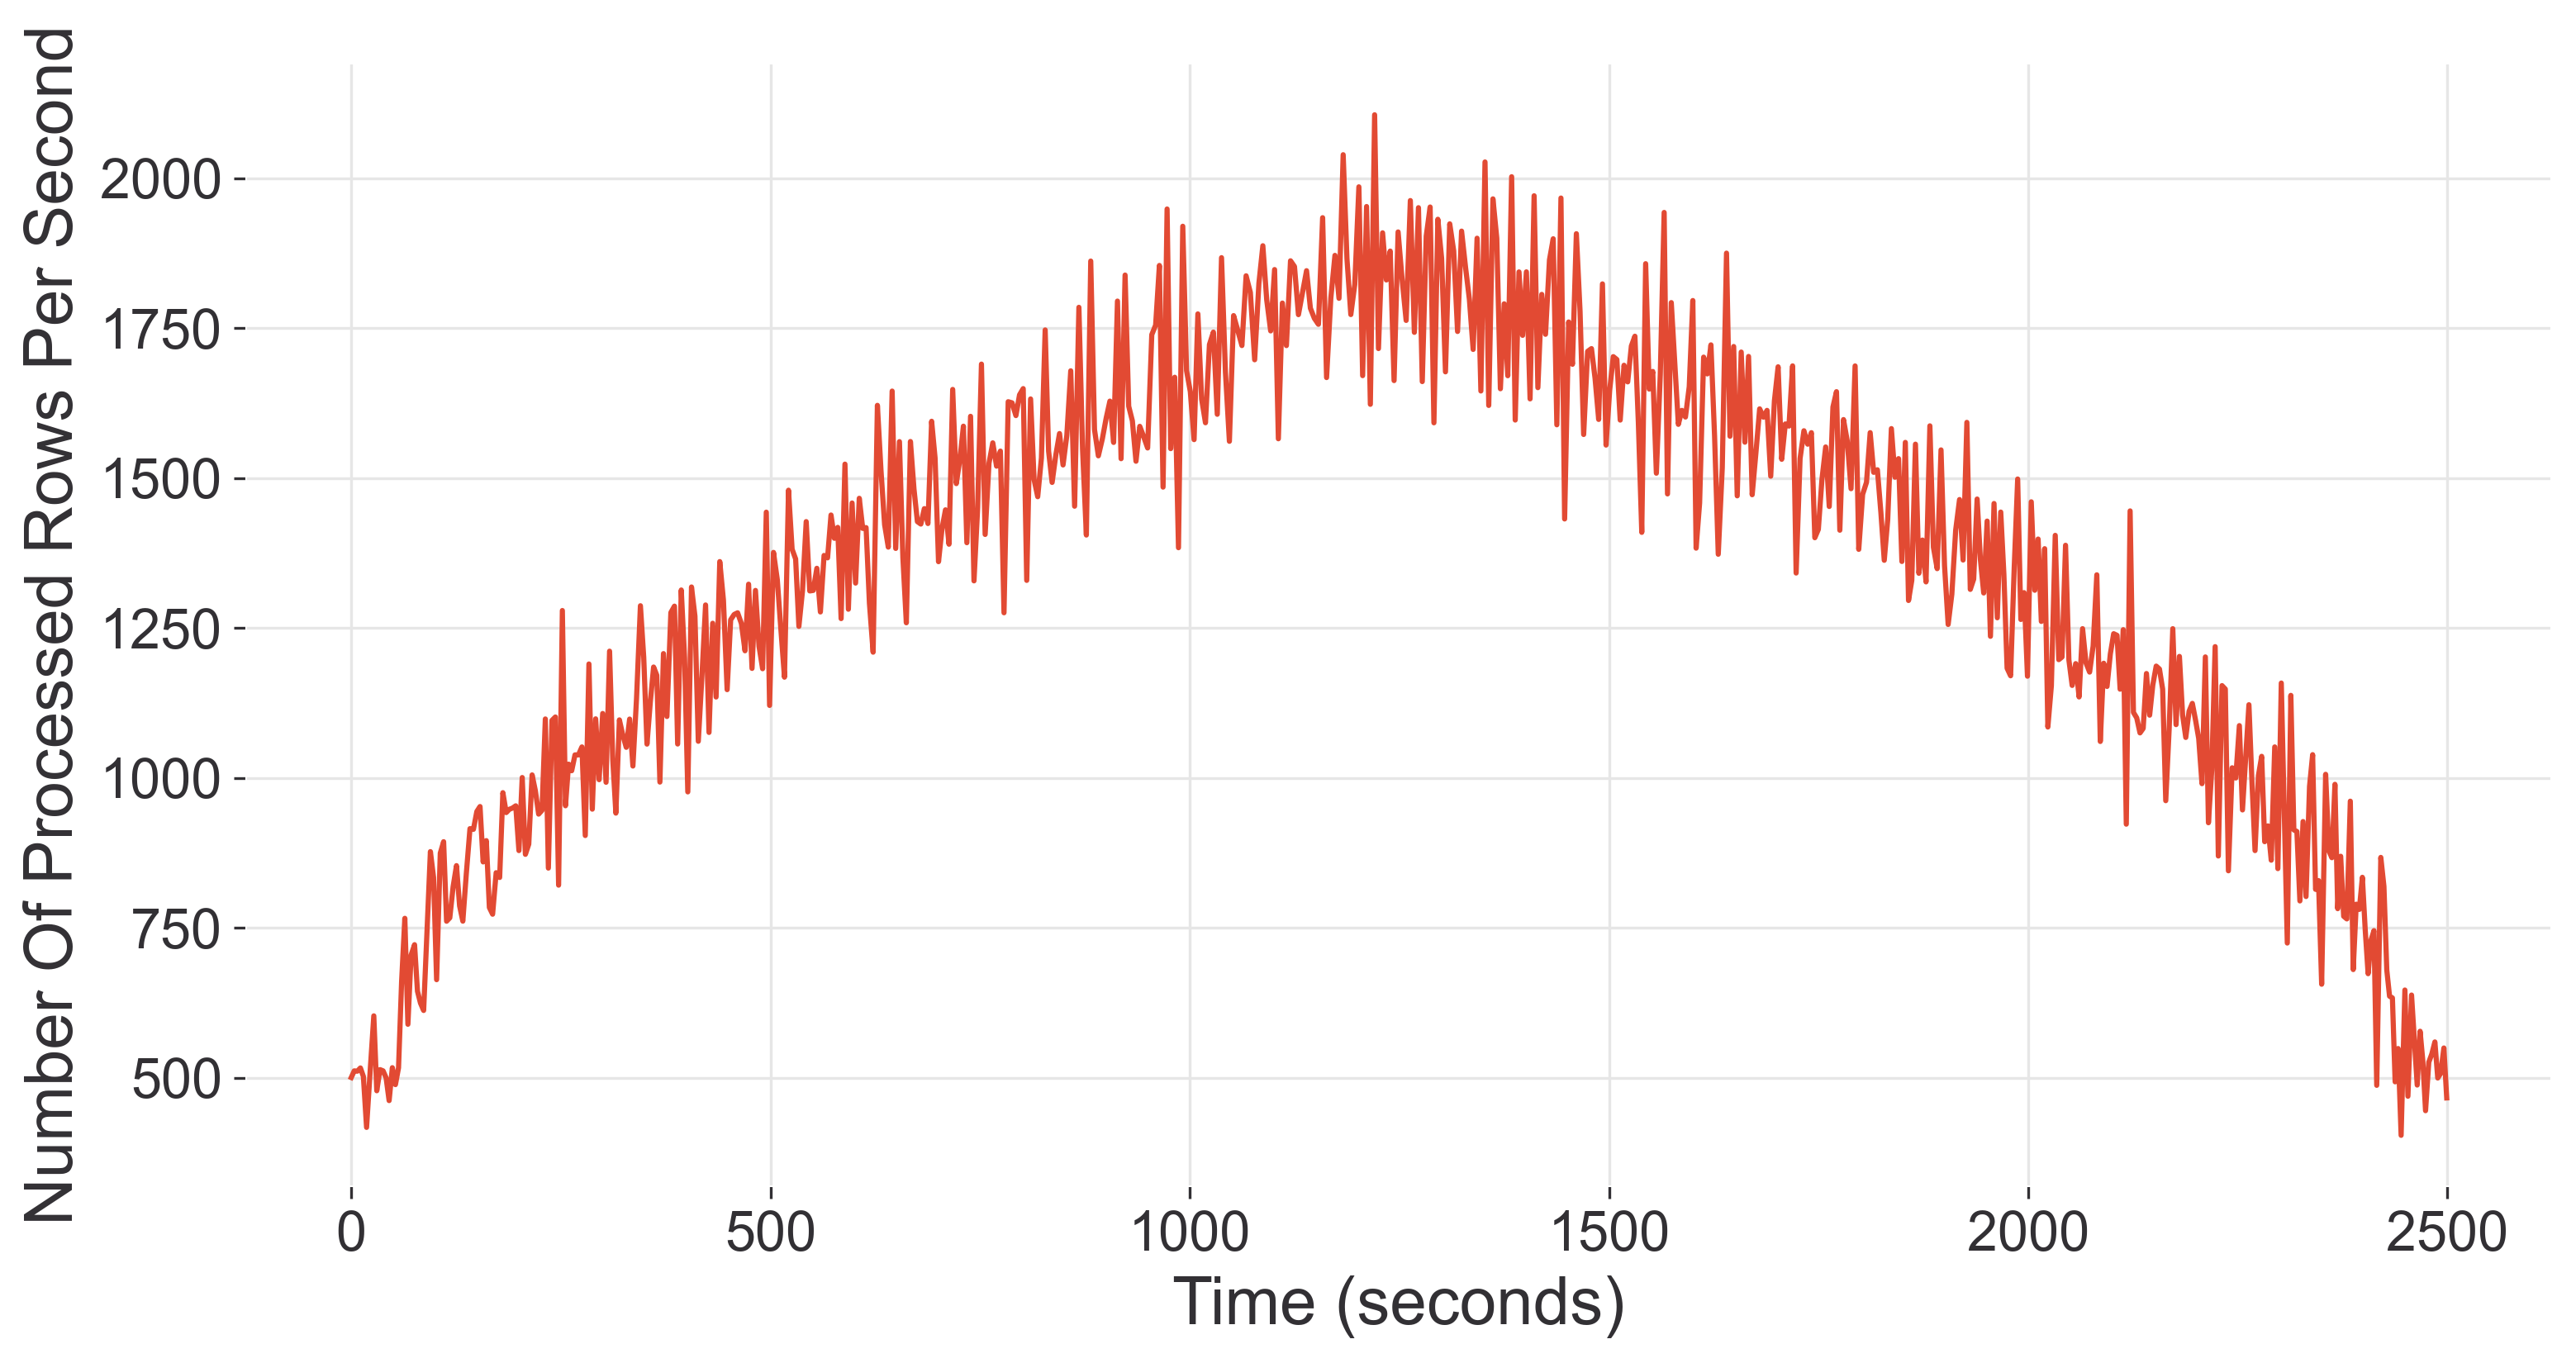

In [62]:
fig, ax = plt.subplots()

# Plot processedRowsPerSecond vs timestamp line graph
ax.plot(statistics["time"], statistics["processedRowsPerSecond"])

plt.xlabel("Time (seconds)")
plt.ylabel("Number Of Processed Rows Per Second")
# plt.title("Number Of Processed Rows Per Second")

# save
plt.savefig("processedRowsPerSecond.png")

plt.show()


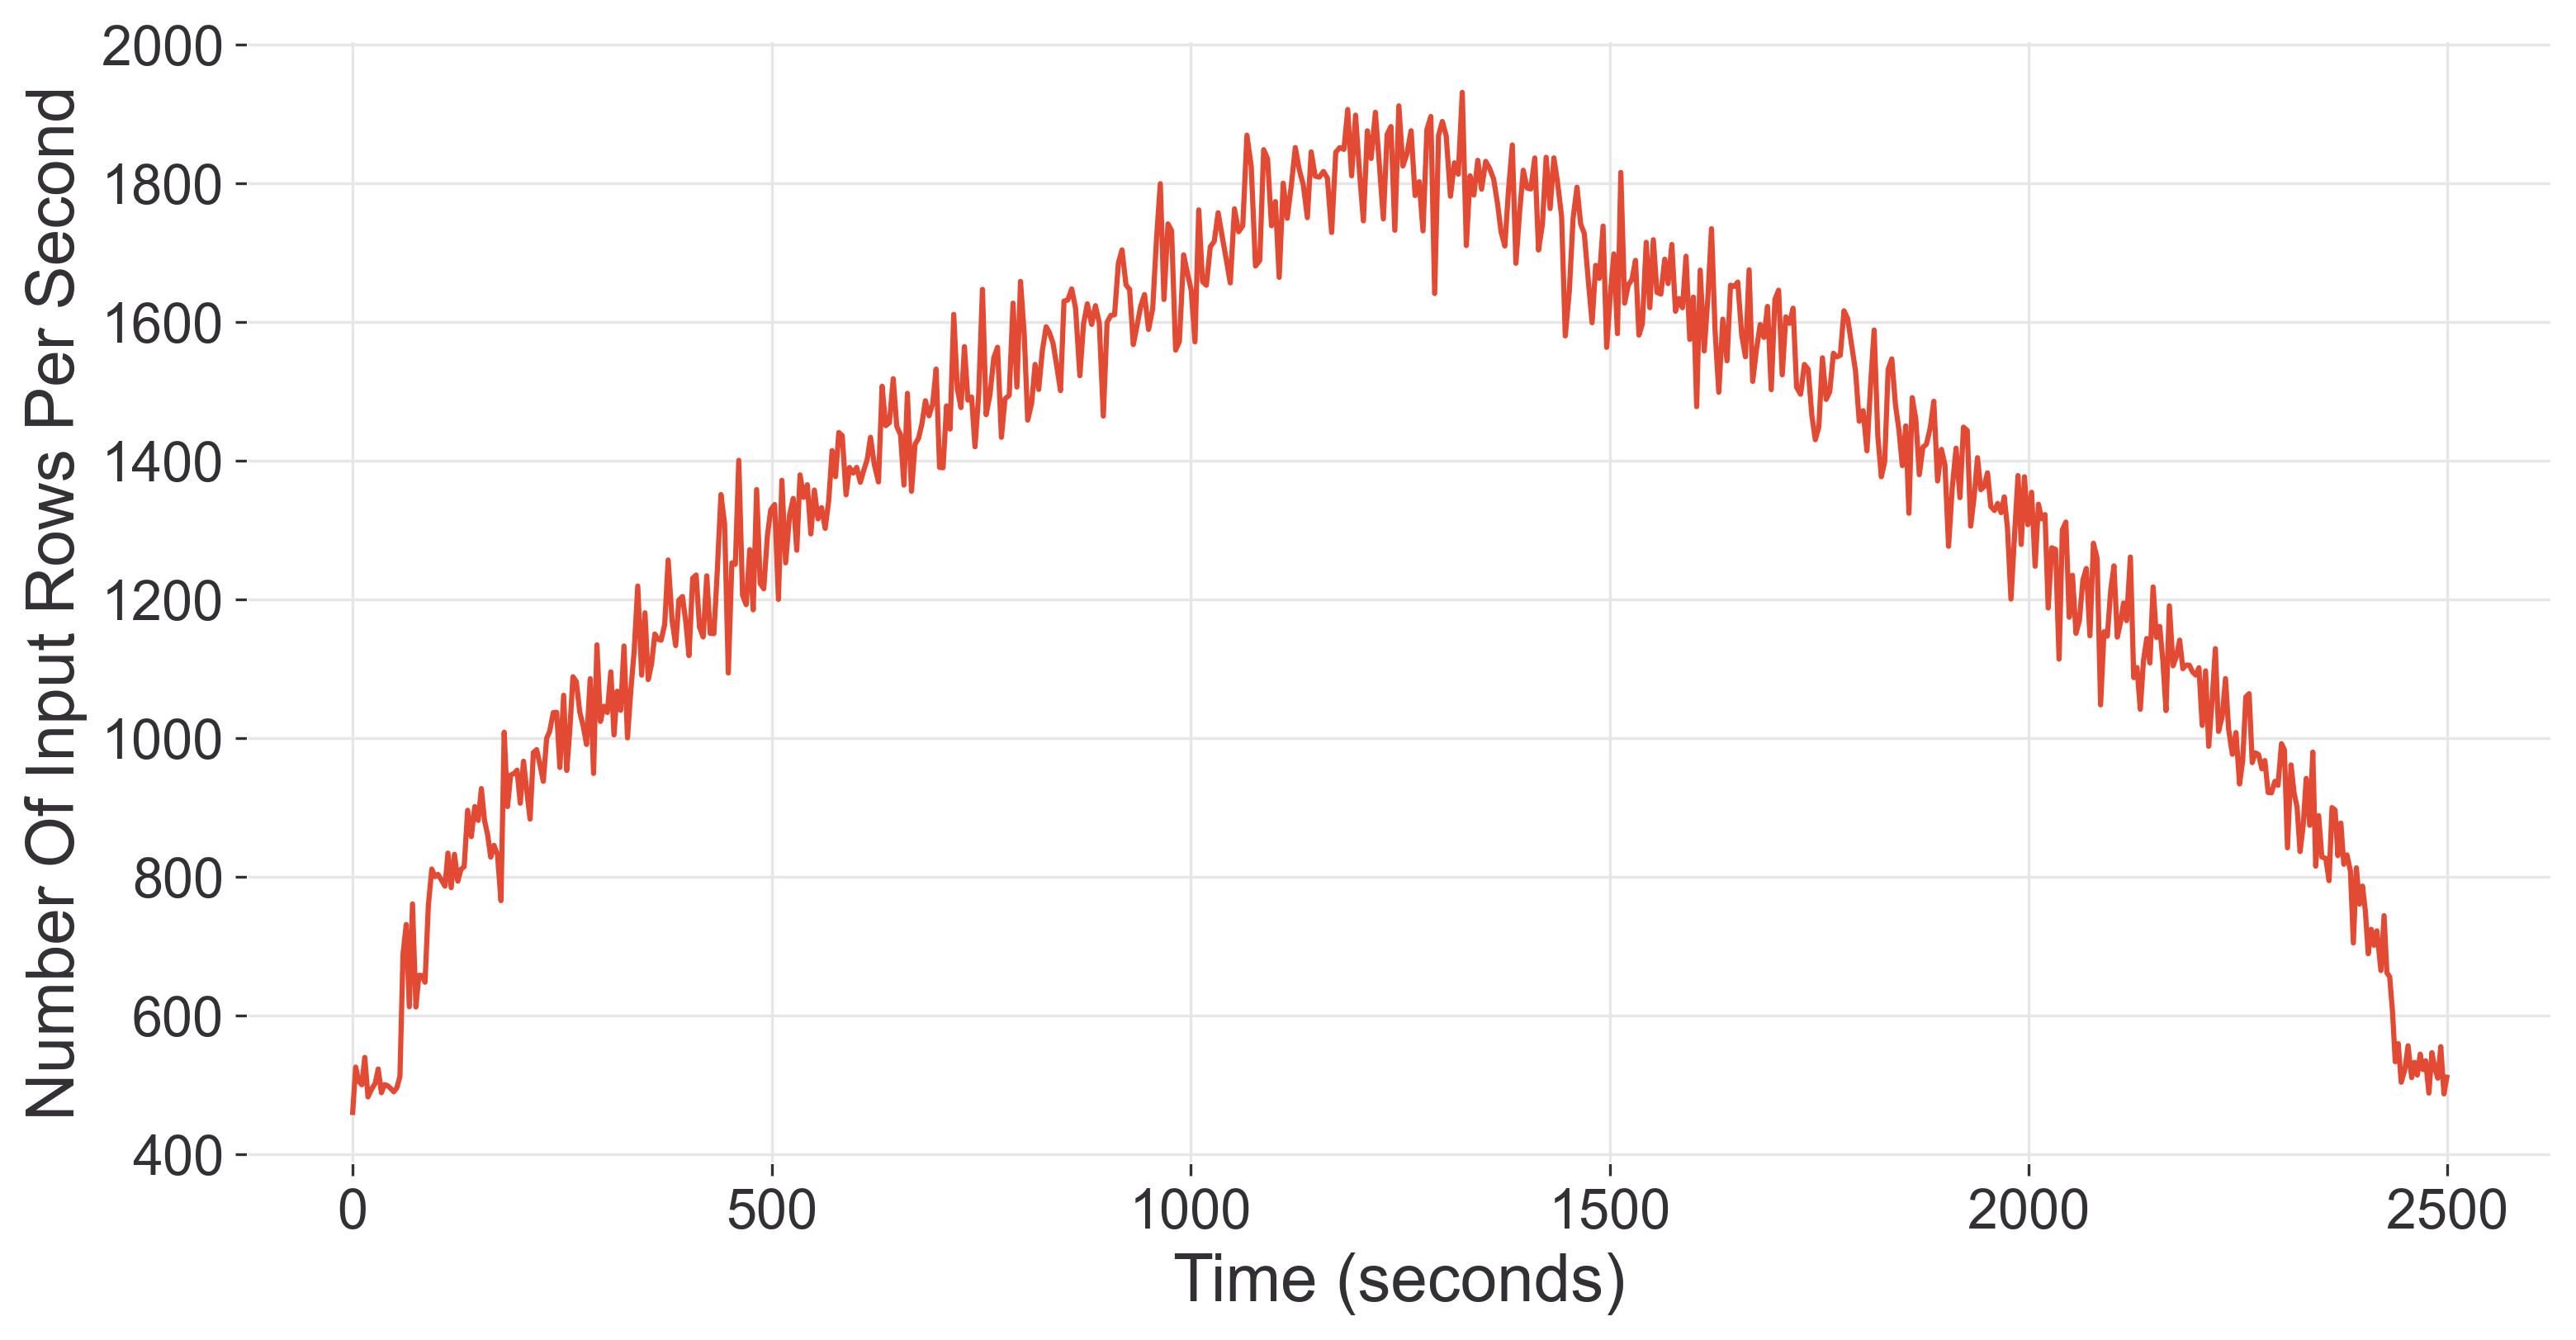

In [63]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()

# Plot inputRowsPerSecond vs timestamp line graph
ax.plot(statistics["time"], statistics["inputRowsPerSecond"])

plt.xlabel("Time (seconds)")
plt.ylabel("Number Of Input Rows Per Second")
# plt.title("Number Of Input Rows Per Second")

# save
plt.savefig("inputRowsPerSecond.png")

plt.show()


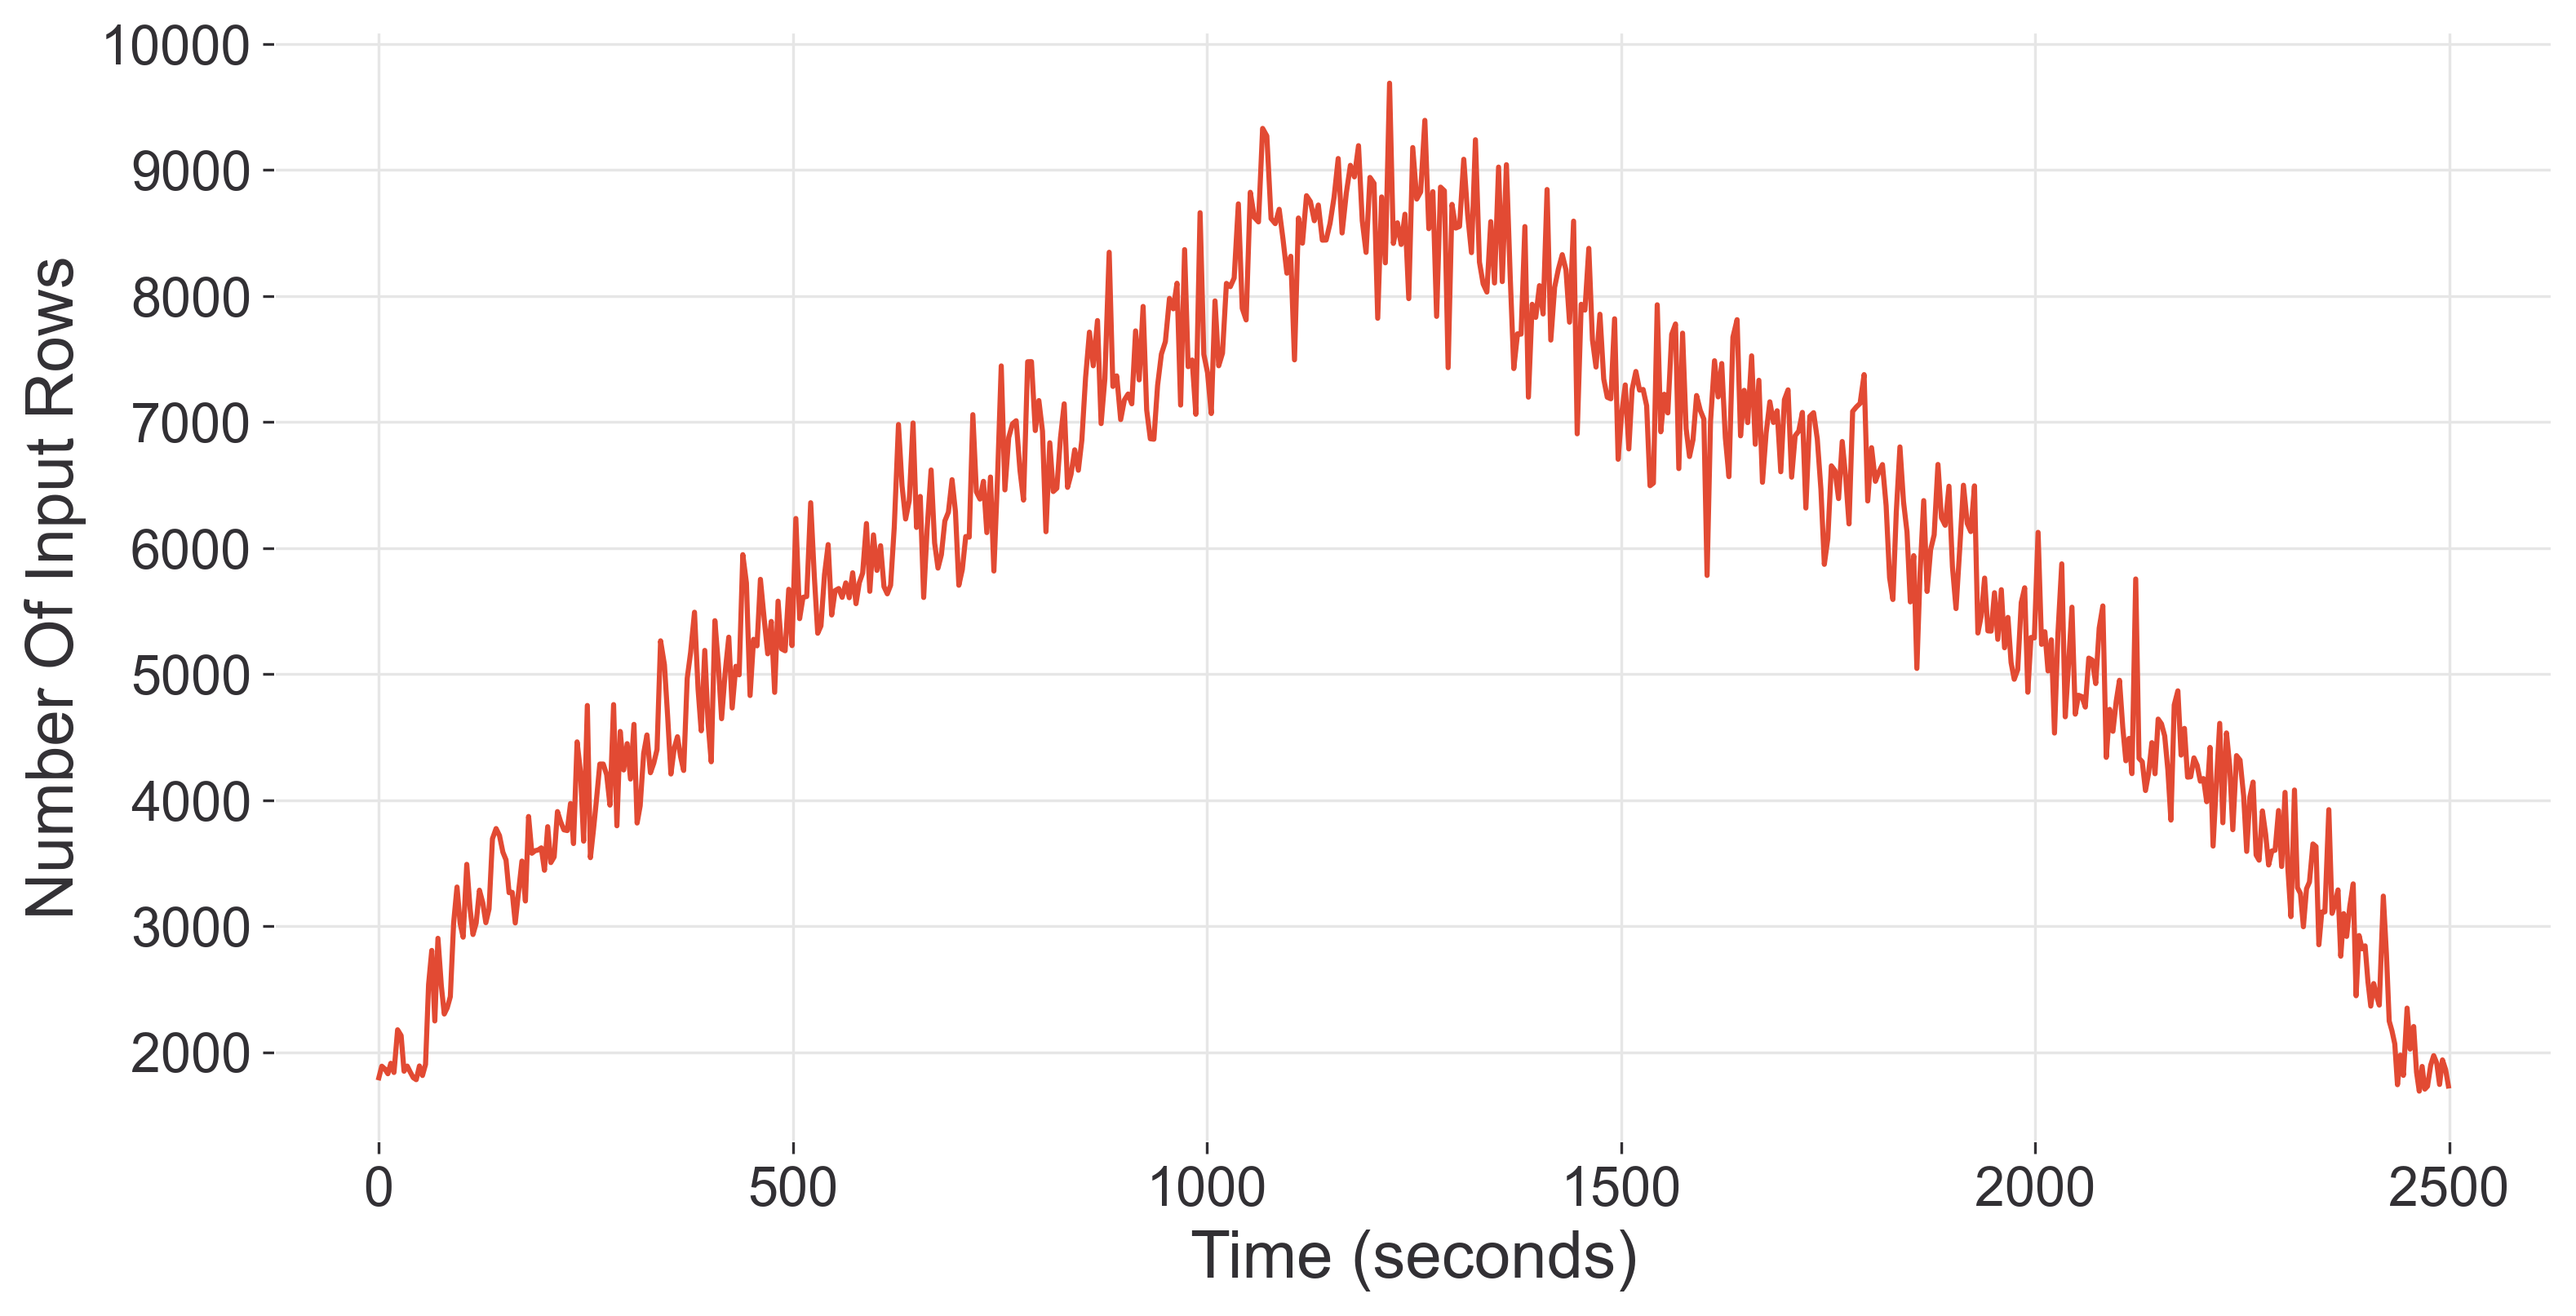

In [64]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()

# Plot numInputRows vs timestamp line graph
ax.plot(statistics["time"], statistics["numInputRows"])

plt.xlabel("Time (seconds)")
plt.ylabel("Number Of Input Rows")
# plt.title("Number Of Input Rows")

# save
plt.savefig("numInputRows.png")

plt.show()


In [65]:
statistics["microbatchDurationMs"].describe()


count      593.000000
mean      8410.556492
std        794.276886
min       6431.000000
25%       7820.000000
50%       8452.000000
75%       8959.000000
max      10422.000000
Name: microbatchDurationMs, dtype: float64

In [66]:
# check if columns has NaN
statistics["microbatchDurationMs"].isnull().values.any()


False

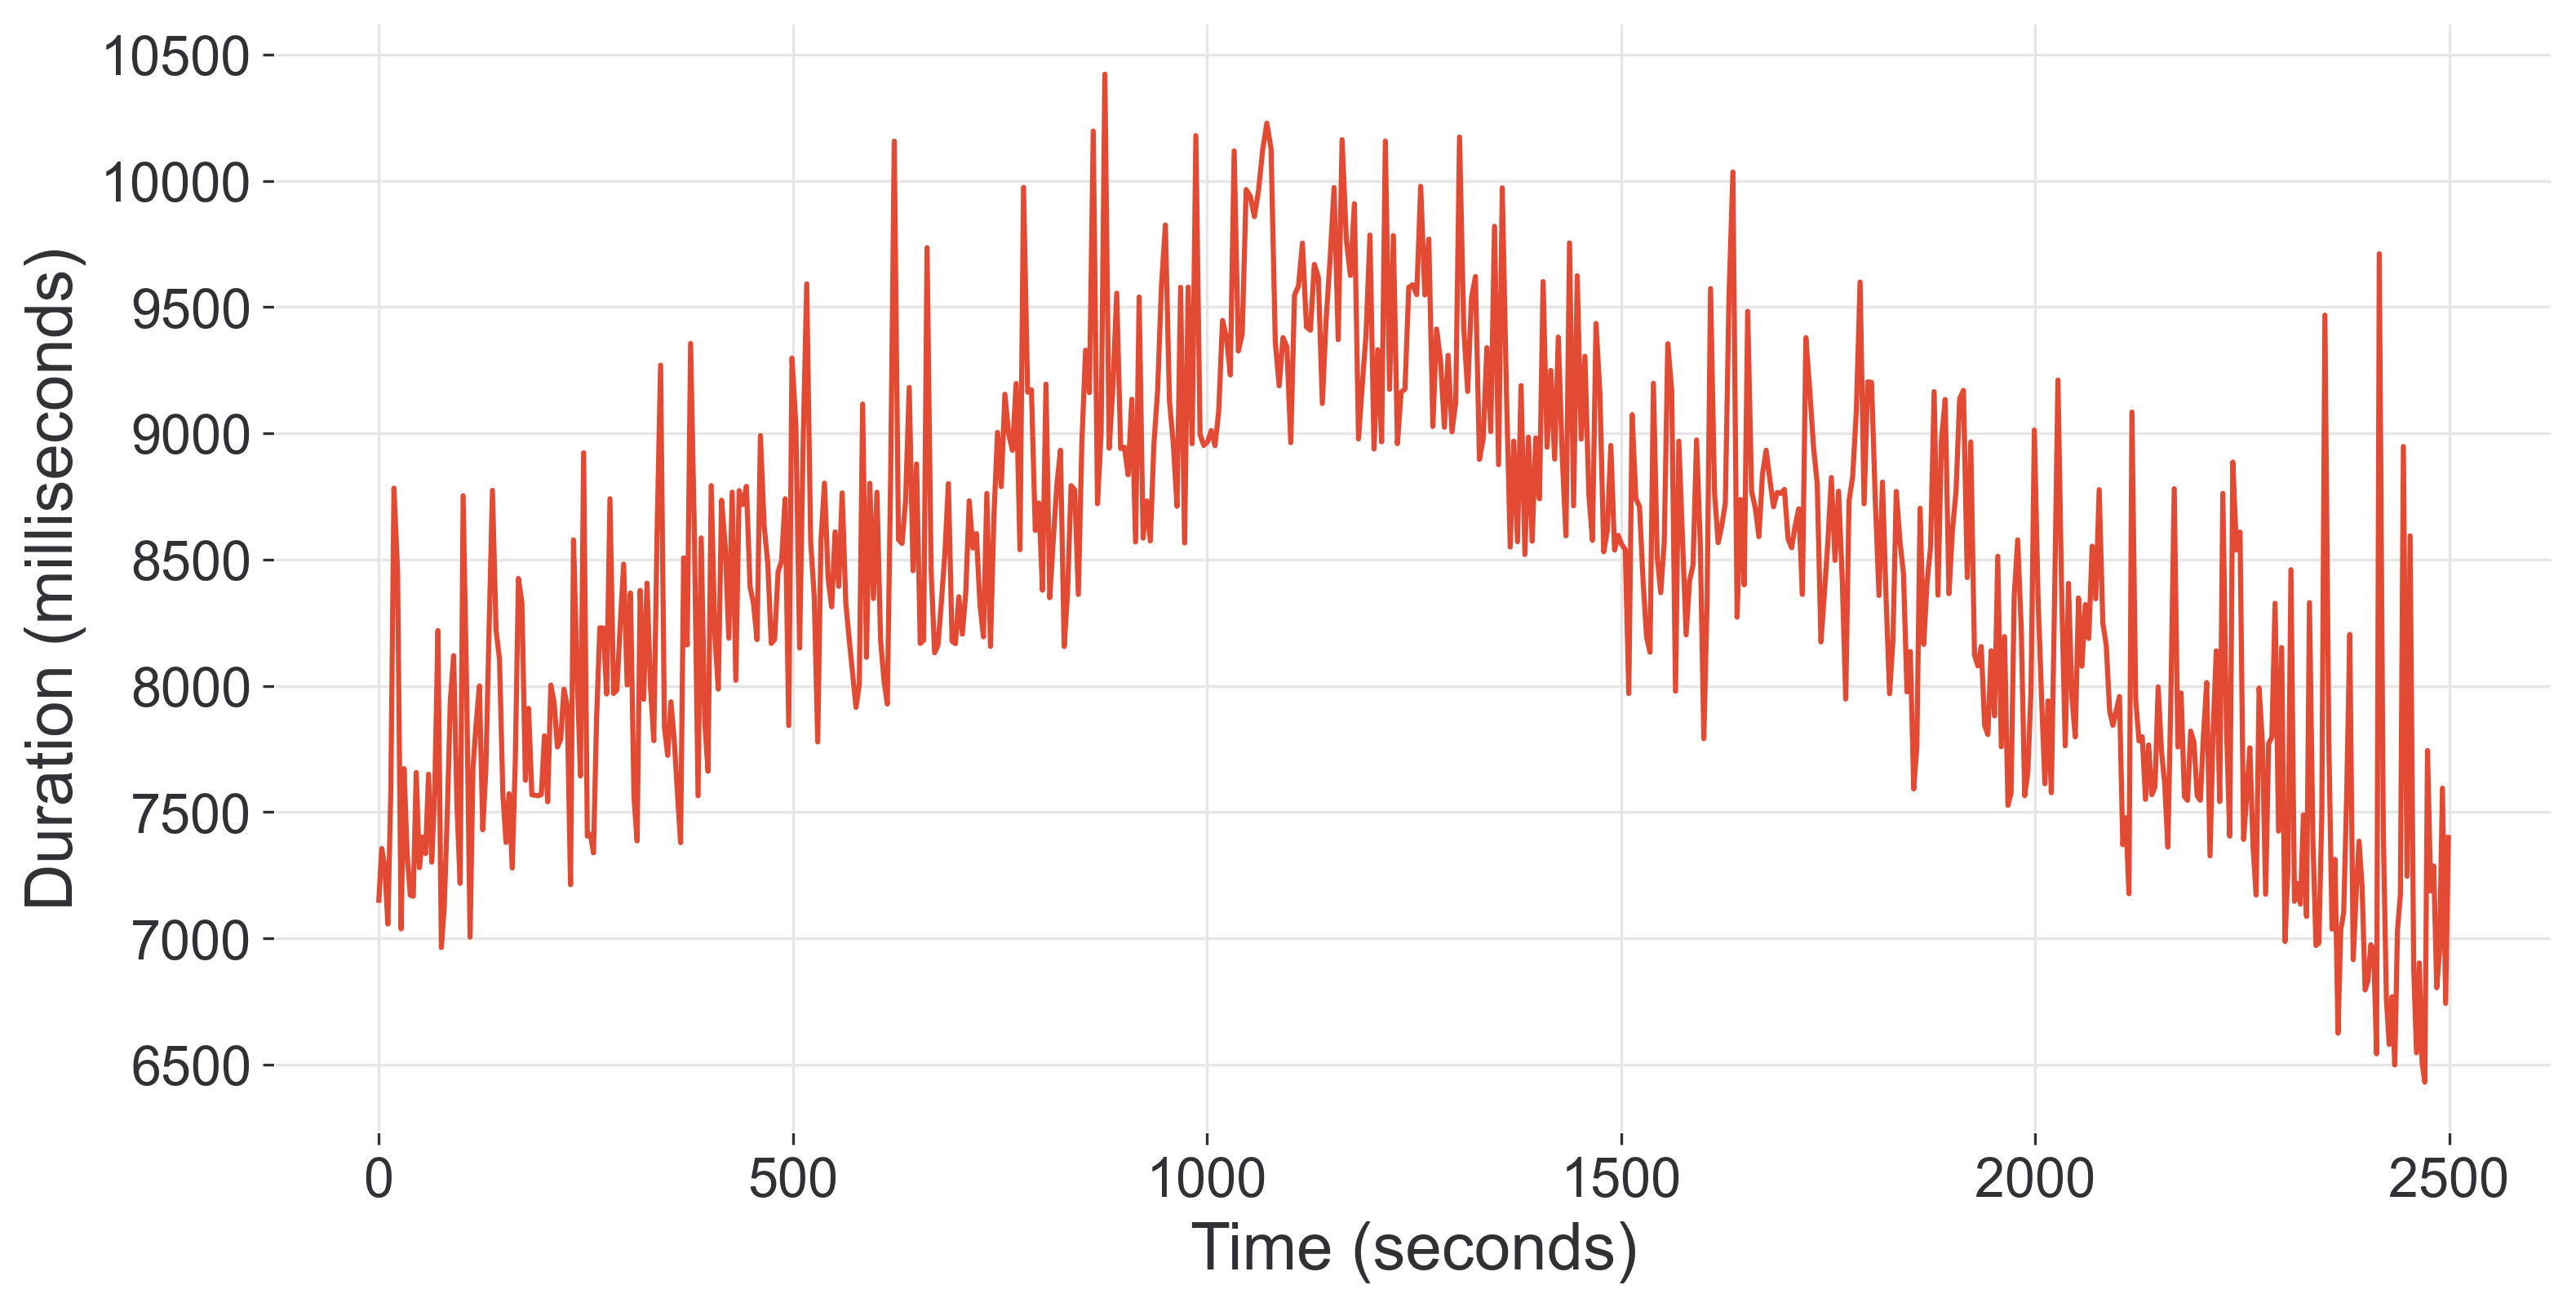

In [67]:
# Micro-batch Duration
fig, ax = plt.subplots()

# Plot microbatchDurationMs vs timestamp line graph
ax.plot(statistics["time"], statistics["microbatchDurationMs"])

plt.xlabel("Time (seconds)")
plt.ylabel("Duration (milliseconds)")
# plt.title("Micro-batch Duration")

# save
plt.savefig("microbatchDurationMs.png")

plt.show()


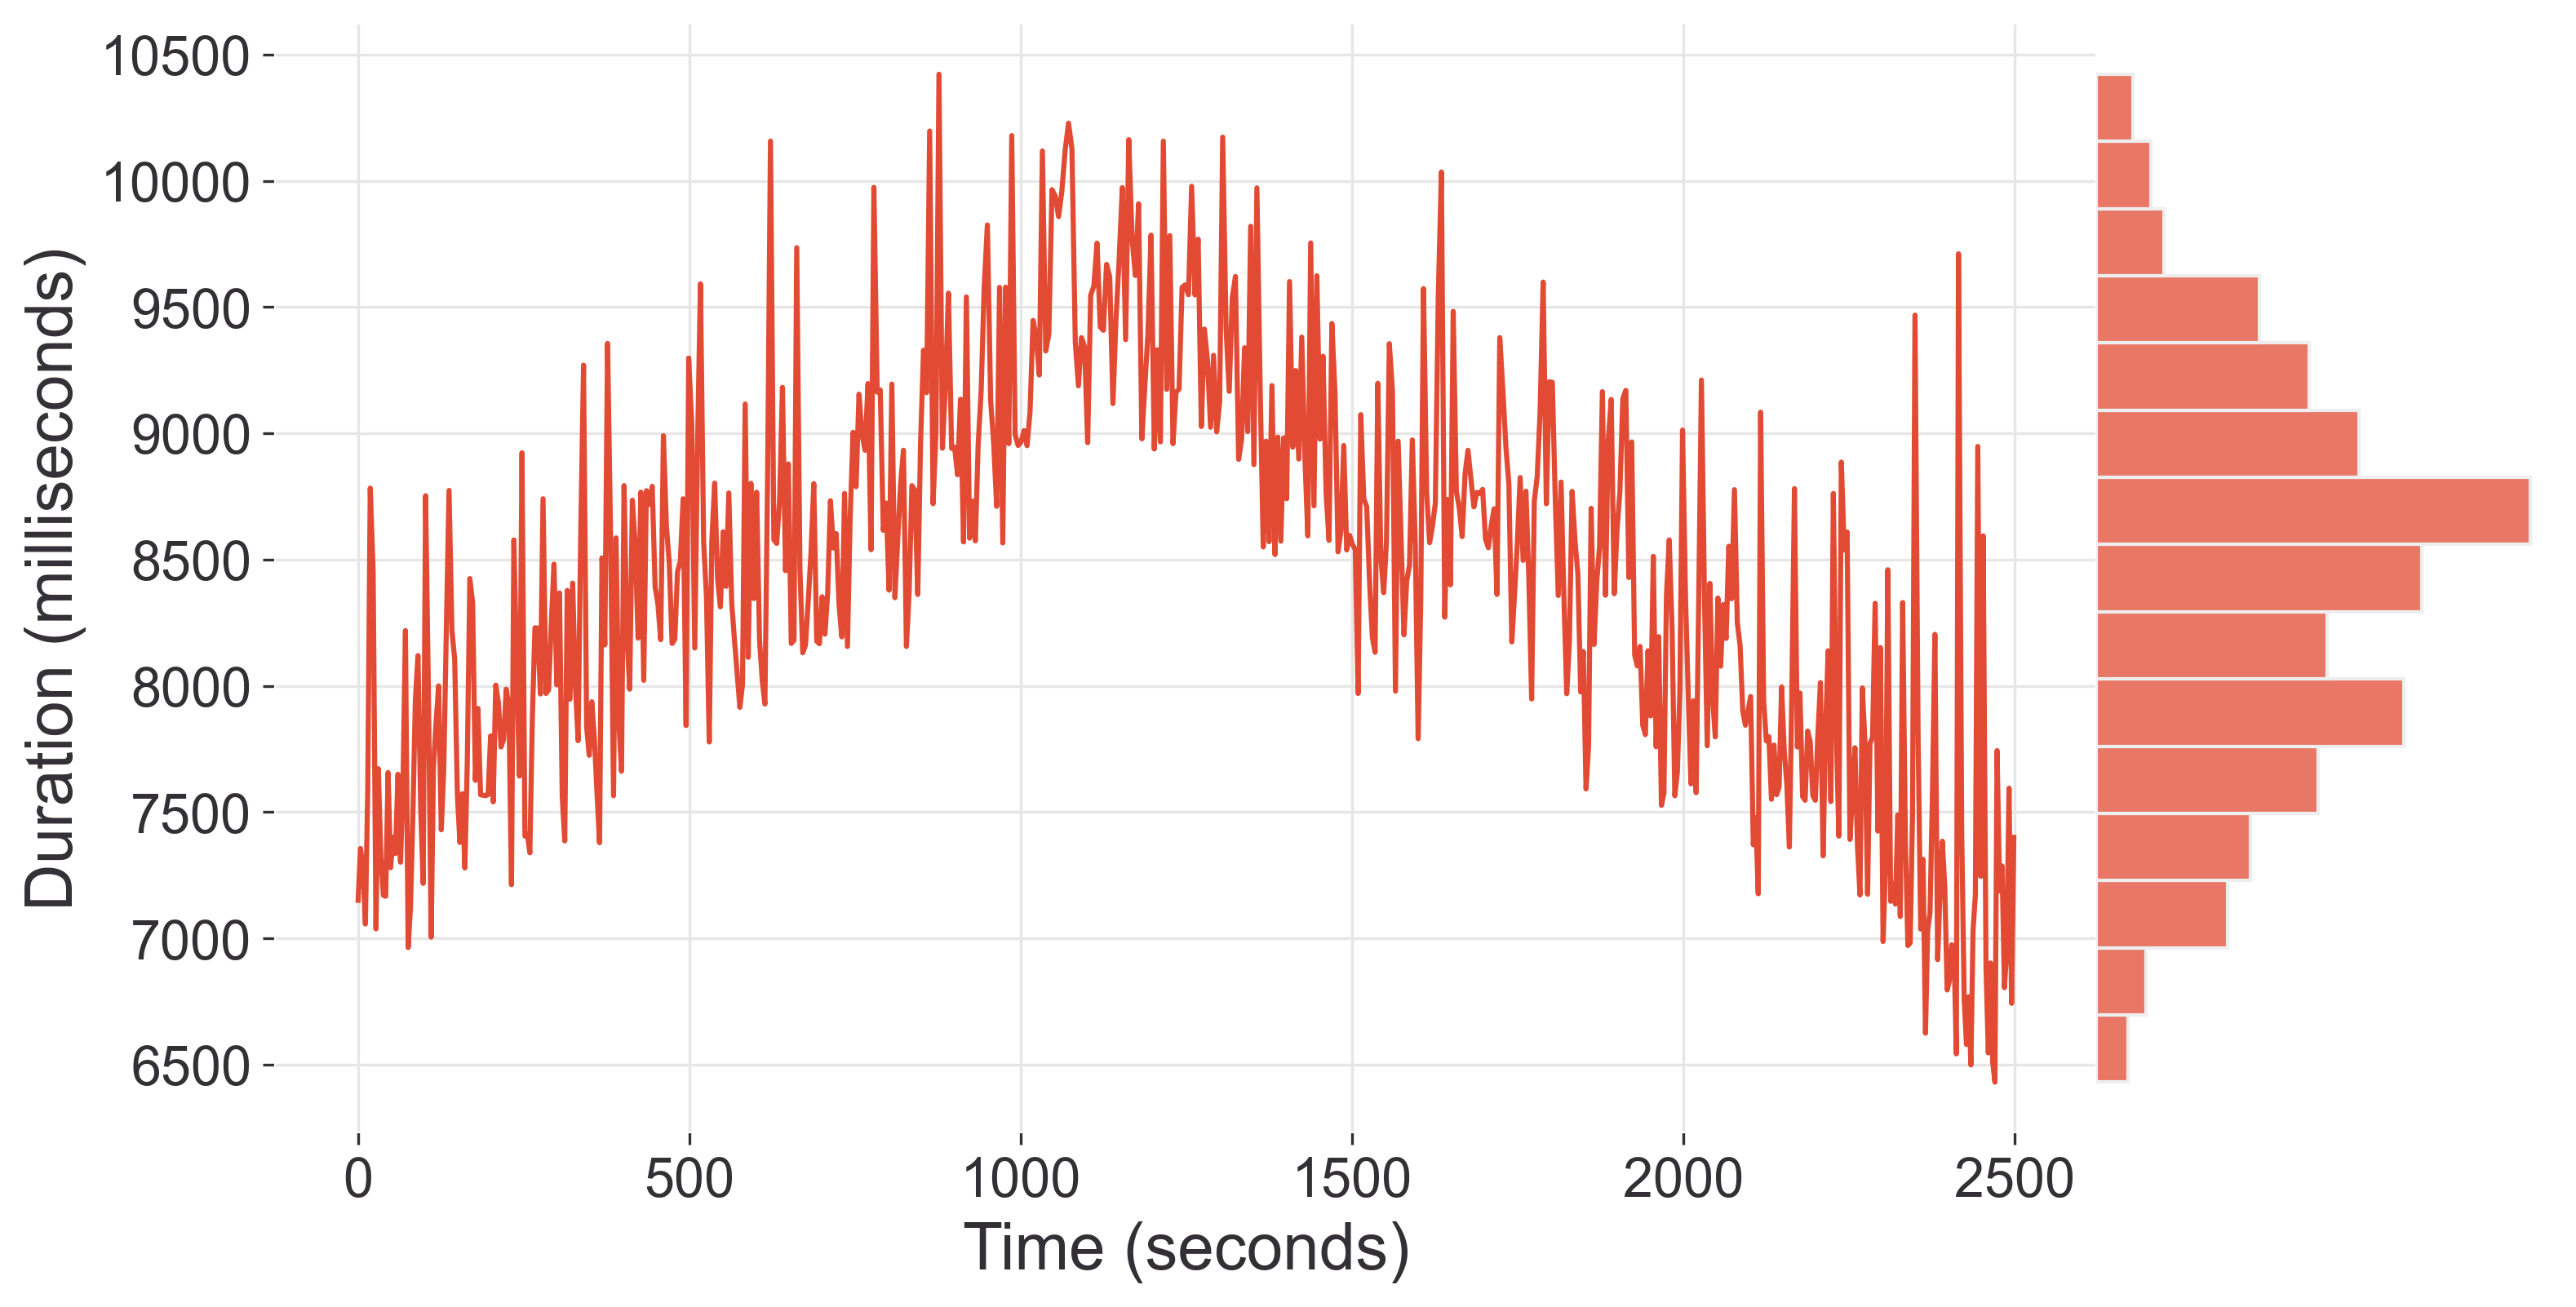

In [68]:
# Plot 2 subplots
f, ax = plt.subplots(1, 2, gridspec_kw={"width_ratios": (0.8, 0.2)})

sns.lineplot(x=statistics["time"], y=statistics["microbatchDurationMs"], ax=ax[0])
sns.histplot(data=statistics, y="microbatchDurationMs", ax=ax[1], color="#E24A33")

# remove yticks, label
ax[1].set_yticks([])
ax[1].set_ylabel("")
ax[1].set_xticks([])
ax[1].set_xlabel("")
ax[1].axis("off")

plt.subplots_adjust(wspace=0, hspace=0)

ax[0].set_xlabel("Time (seconds)")
ax[0].set_ylabel("Duration (milliseconds)")

# save
plt.savefig("microbatchDurationMsLineHistPlot.png")

plt.show()


In [69]:
statistics["microbatchDurationMs"].describe()

count      593.000000
mean      8410.556492
std        794.276886
min       6431.000000
25%       7820.000000
50%       8452.000000
75%       8959.000000
max      10422.000000
Name: microbatchDurationMs, dtype: float64

In [70]:
bins = [x for x in range(int(statistics["microbatchDurationMs"].min()) - 1, int(statistics["microbatchDurationMs"].max()) + 500, 500)]
bins

[6430, 6930, 7430, 7930, 8430, 8930, 9430, 9930, 10430]

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '6430 to 6930'),
  Text(1, 0, '6930 to 7430'),
  Text(2, 0, '7430 to 7930'),
  Text(3, 0, '7930 to 8430'),
  Text(4, 0, '8430 to 8930'),
  Text(5, 0, '8930 to 9430'),
  Text(6, 0, '9430 to 9930'),
  Text(7, 0, '9930 to 10430')])

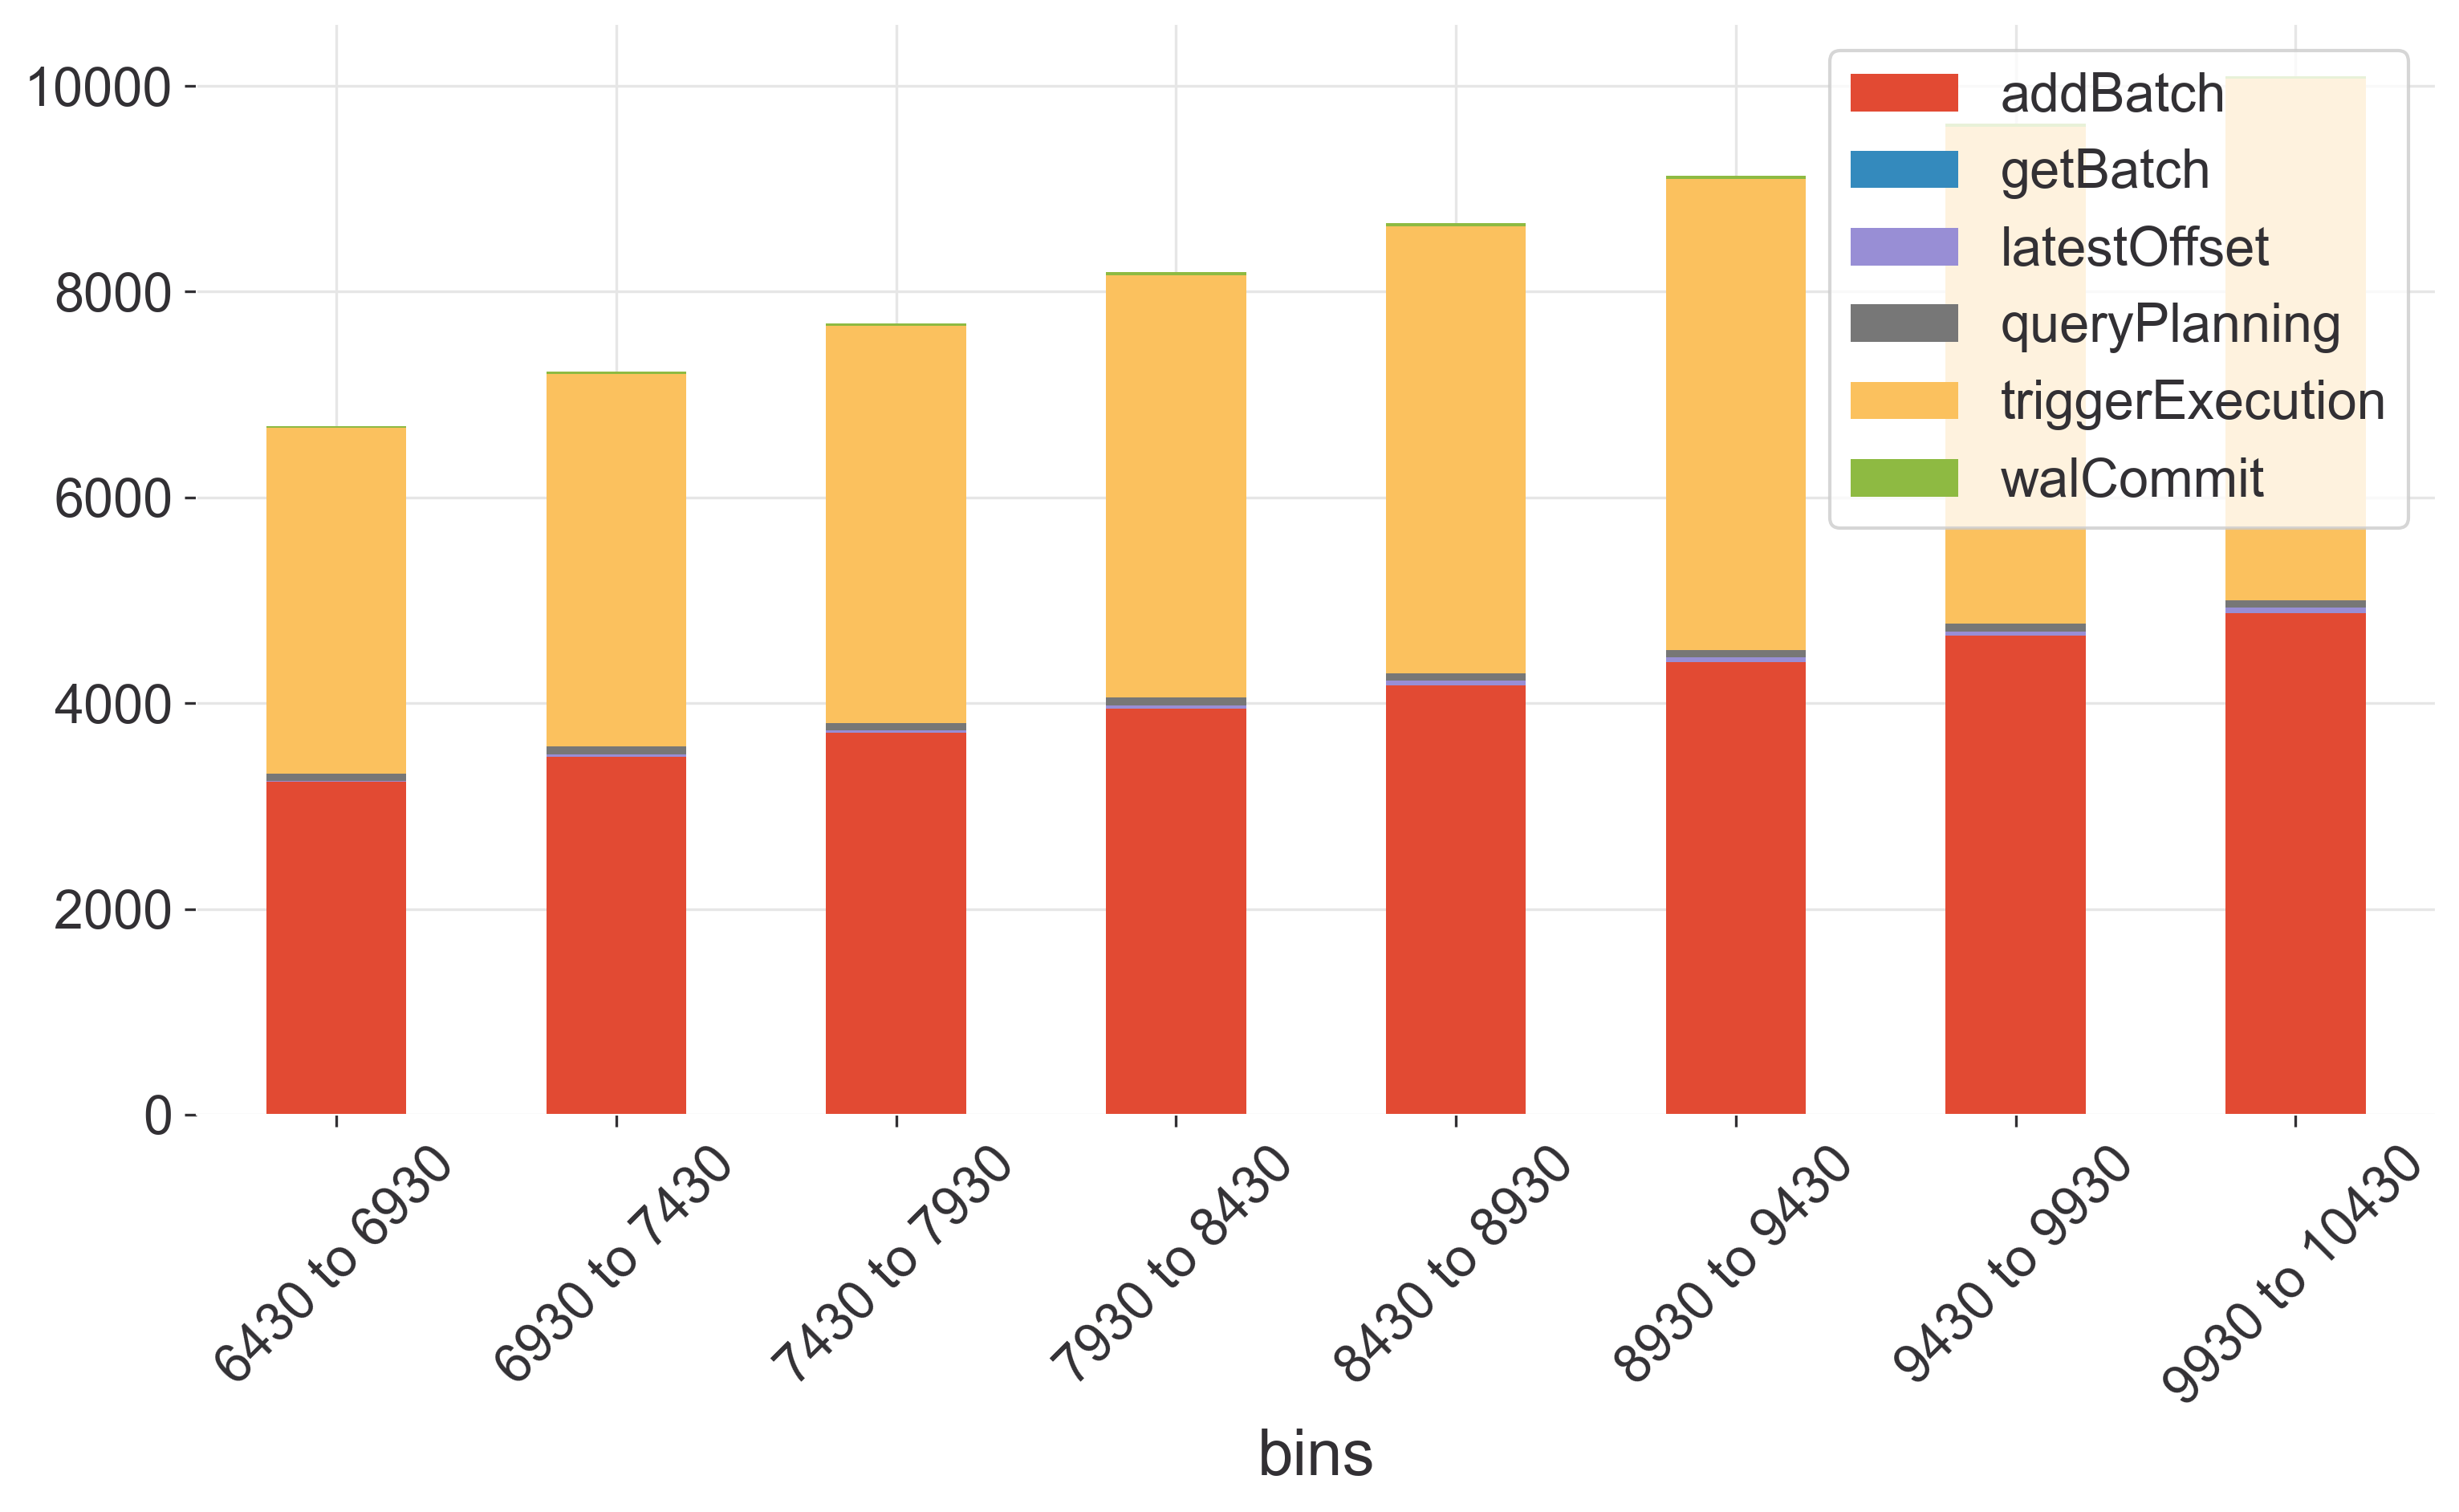

In [71]:
statistics["bins"] = pd.cut(statistics["microbatchDurationMs"], bins=bins) #, include_lowest=True)

# ax = out.value_counts(sort=False).plot.bar(rot=0, stacked=True) # , figsize=(6,4))
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])

# statistics.set_index("bins", inplace=True)

stats = statistics.groupby("bins")[[
    "addBatch",
    "getBatch",
    "latestOffset",
    "queryPlanning",
    "triggerExecution",
    "walCommit"
]].mean()

# group by bins and get the mean
ax = stats.plot(kind="bar", rot=0, stacked=True)

ax.set_xticklabels([str(c)[1:-1].replace(","," to") for c in stats.index.categories])

plt.xticks(rotation=45)

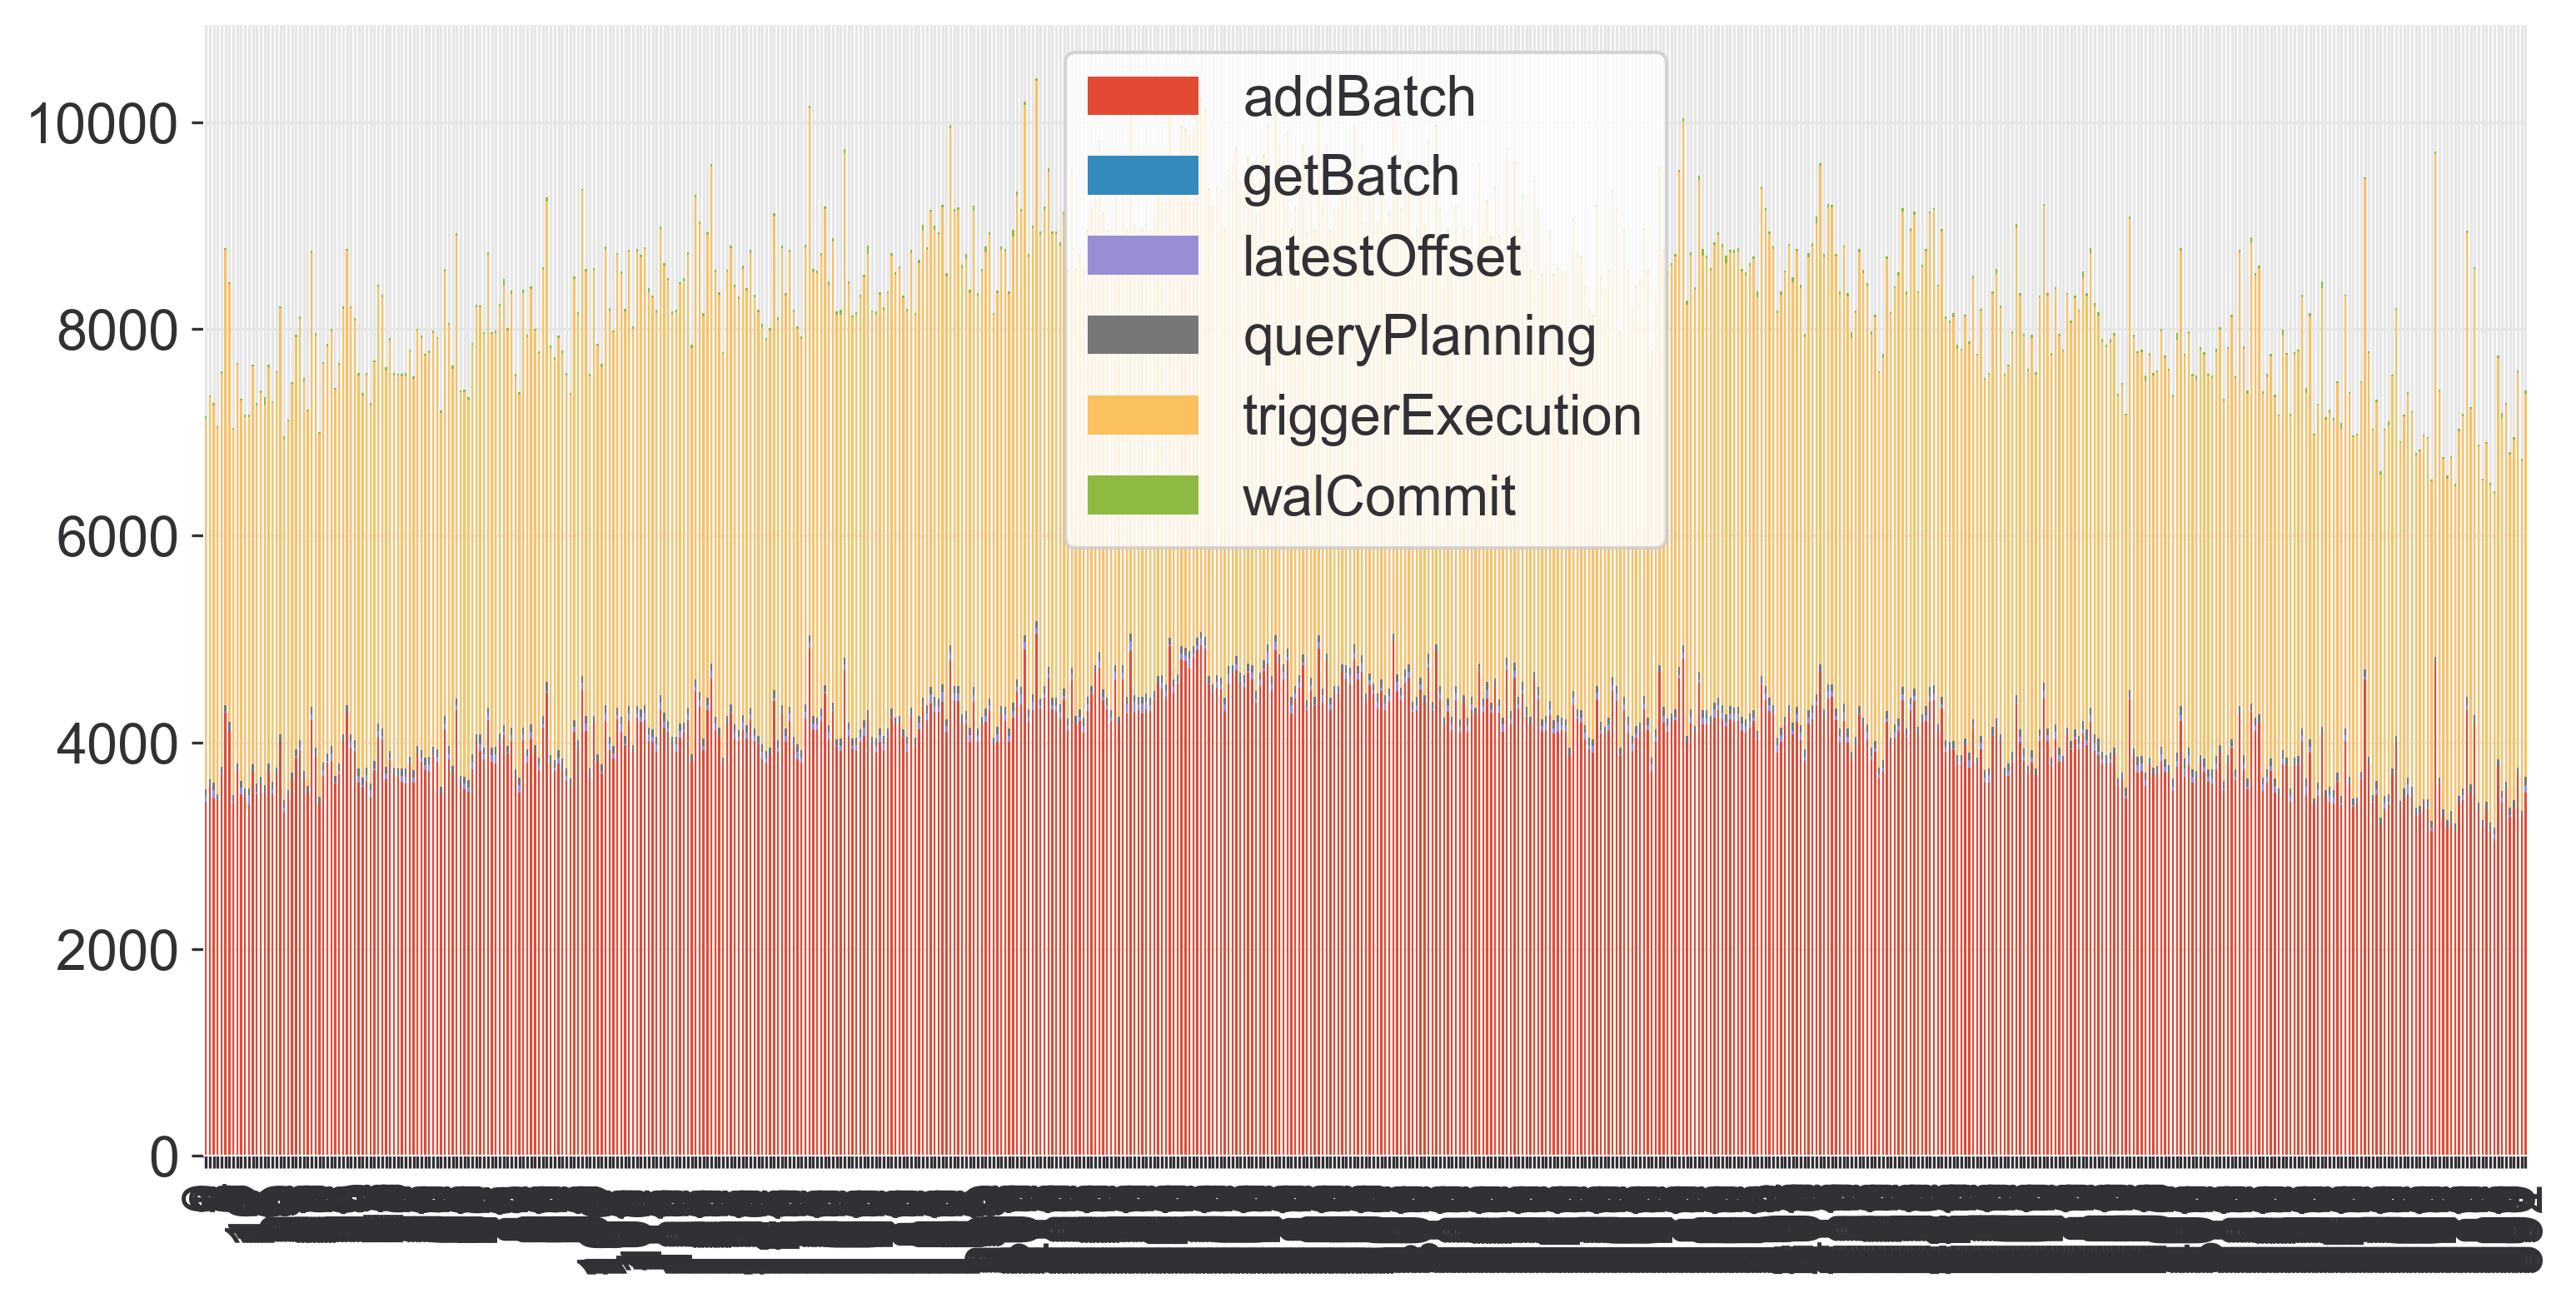

In [72]:


statistics[[
    "addBatch",
    "getBatch",
    "latestOffset",
    "queryPlanning",
    "triggerExecution",
    "walCommit"
]].plot(kind="bar", stacked=True)

plt.show()

Text(0, 0.5, 'Temp ranges in Degree Celsius')

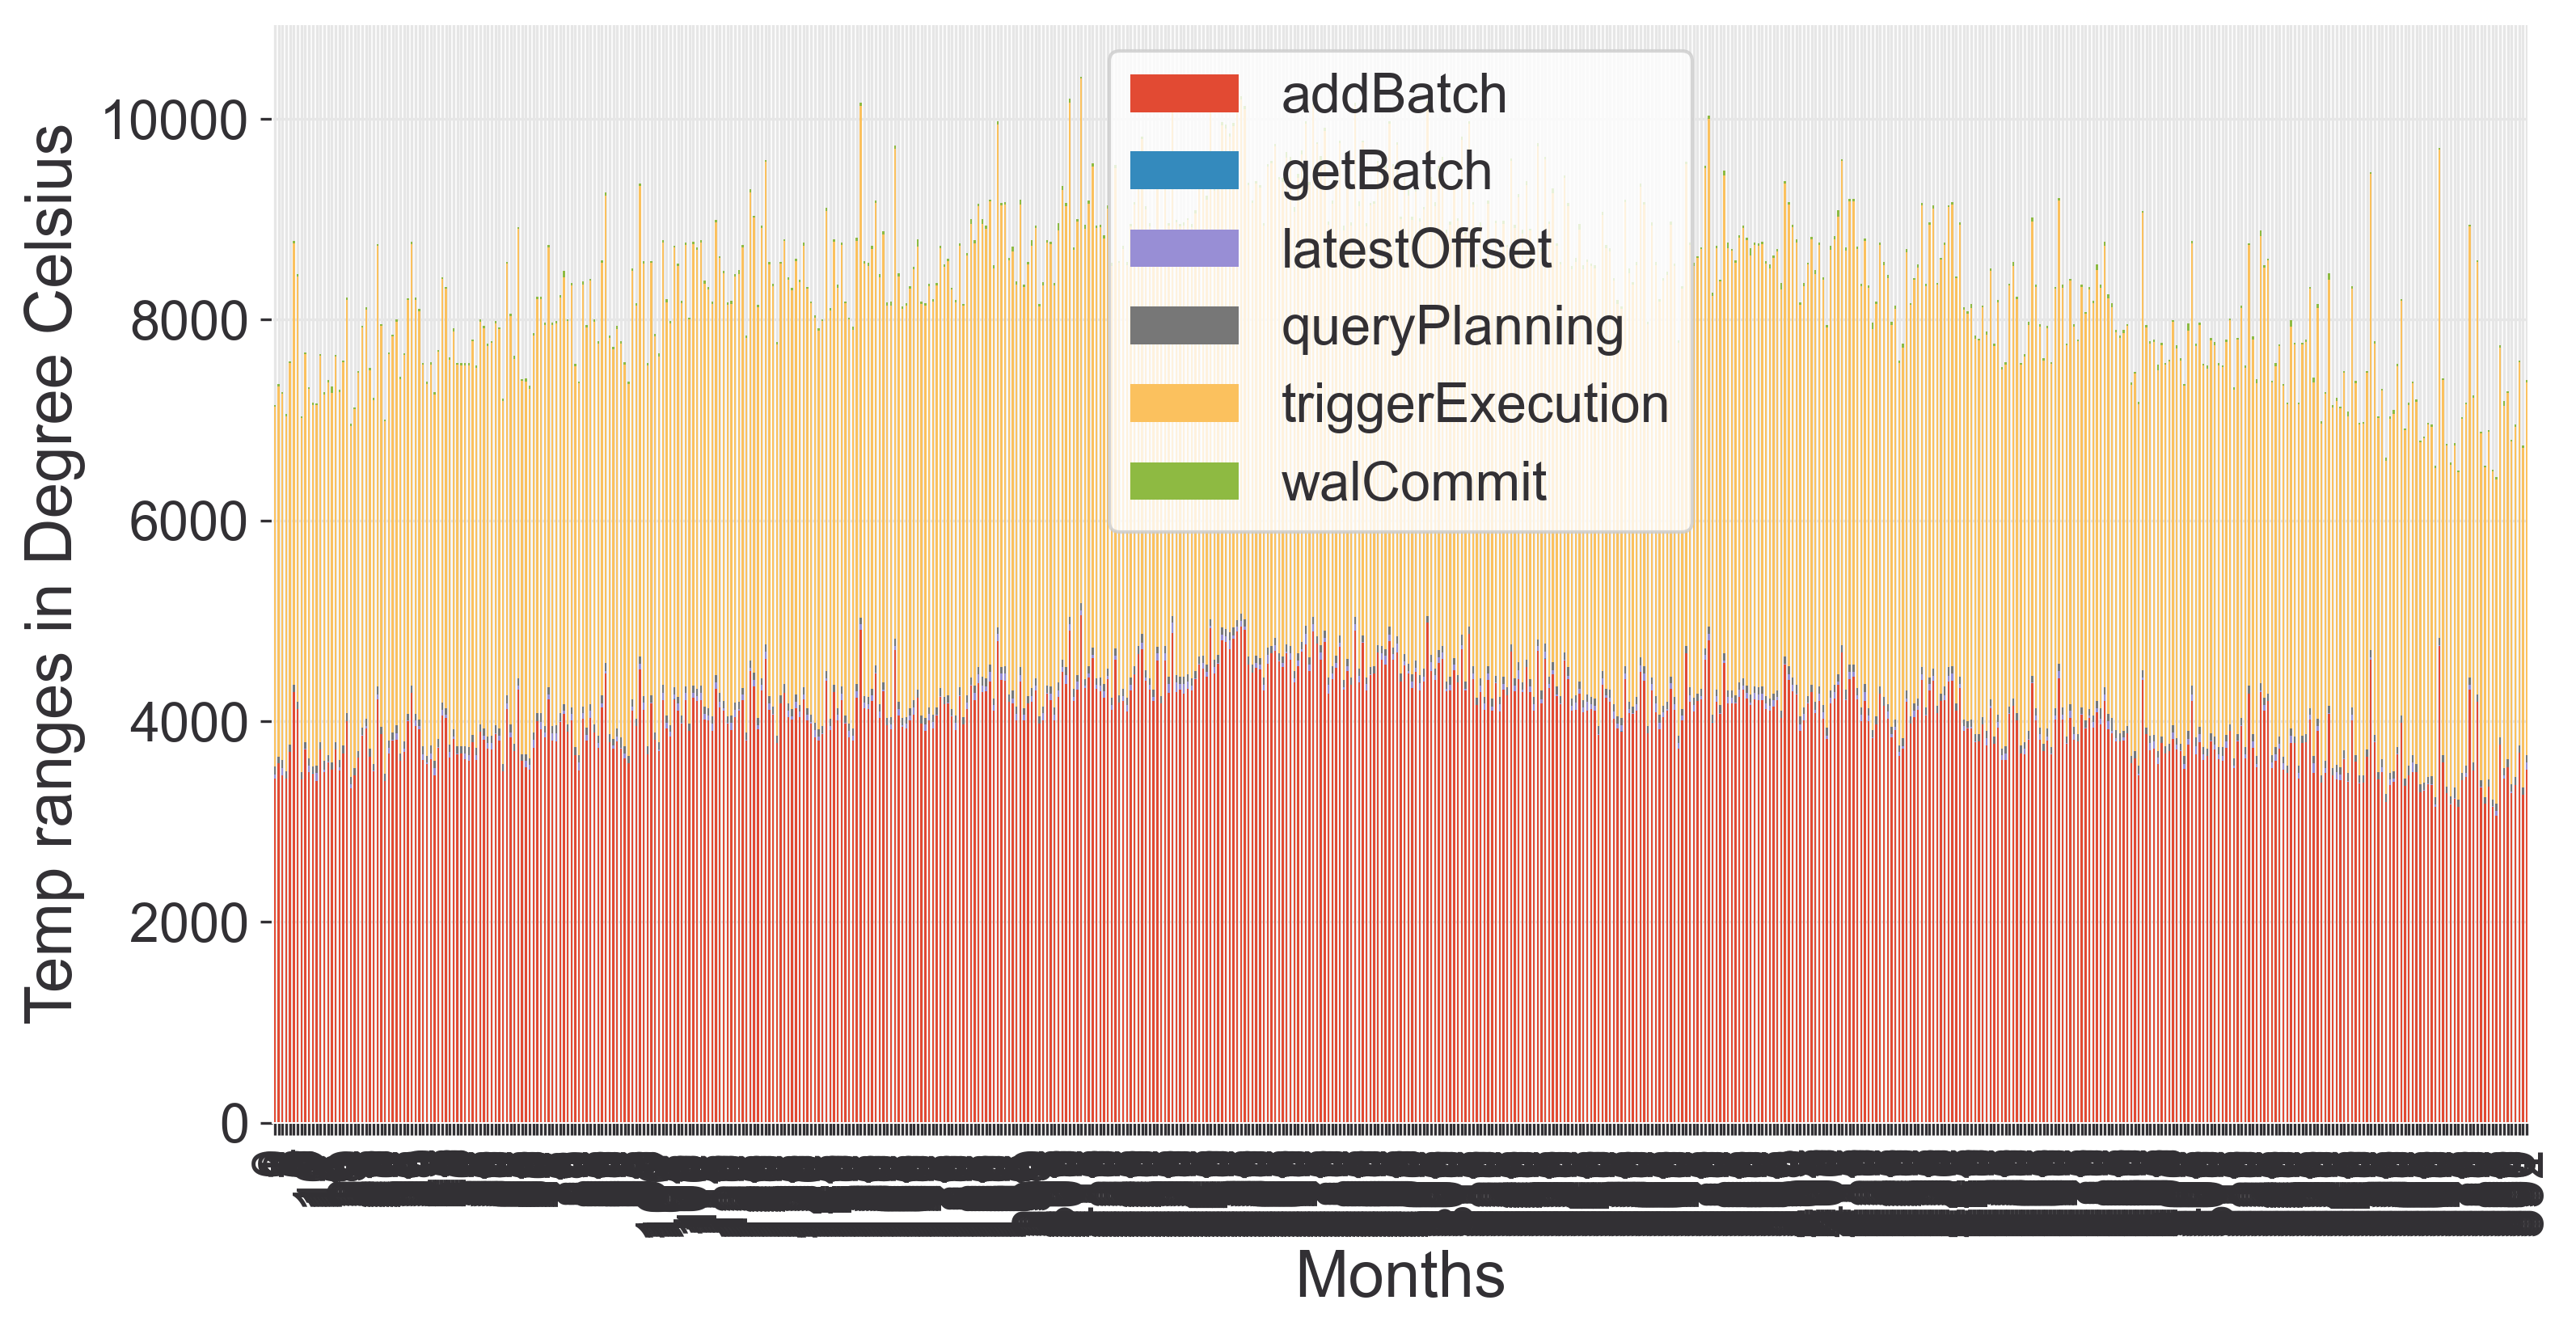

In [73]:
# create stacked bar chart for monthly temperatures
statistics[[
    "addBatch",
    "getBatch",
    "latestOffset",
    "queryPlanning",
    "triggerExecution",
    "walCommit",
]].plot(
    kind="bar", stacked=True
)  # , color=['red', 'skyblue', 'green'])

# labels for x & y axis
plt.xlabel("Months")
plt.ylabel("Temp ranges in Degree Celsius")

# title of plot
# plt.title('Monthly Temperatures in a year')


<AxesSubplot:ylabel='Frequency'>

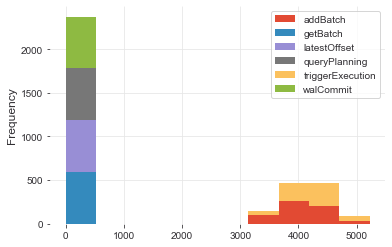

In [ ]:
# create stacked bar chart for monthly temperatures
statistics[[
    "addBatch",
    "getBatch",
    "latestOffset",
    "queryPlanning",
    "triggerExecution",
    "walCommit",
]].plot(
    kind="hist", stacked=True
)  # , color=['red', 'skyblue', 'green'])

# labels for x & y axis
# plt.xlabel("Months")
# plt.ylabel("Temp ranges in Degree Celsius")

# title of plot
# plt.title('Monthly Temperatures in a year')
